In [1]:
from __future__ import print_function, division, absolute_import

import sys, os
!pip install ujson
!pip install --upgrade tables
import ujson
import gc
import csv
import time

import numpy as np   # using 1.10.1
import pandas as pd  # using 0.13.1
import scipy
from os.path import basename, exists

# plotting
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
from argparse import ArgumentParser

import h5py    
import numpy as np    
from google.colab import drive
drive.mount('/content/gdrive')

Requirement already up-to-date: tables in /usr/local/lib/python3.7/dist-packages (3.6.1)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#!ls /content/gdrive/MyDrive/VOS/planet-hunters-tess-classifications_sec22.h5
filename='/content/gdrive/MyDrive/VOS/planet-hunters-tess-classifications_sec22.h5'
df = pd.read_hdf(filename, str='r')
print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 293888 entries, 4917142 to 5581393
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   classification_id  293888 non-null  int64  
 1   user_name          293888 non-null  object 
 2   user_id            272074 non-null  float64
 3   user_ip            293888 non-null  object 
 4   workflow_id        293888 non-null  int64  
 5   workflow_name      293888 non-null  object 
 6   workflow_version   293888 non-null  float64
 7   created_at         293888 non-null  object 
 8   gold_standard      0 non-null       float64
 9   expert             0 non-null       float64
 10  metadata           293888 non-null  object 
 11  annotations        293888 non-null  object 
 12  subject_data       293888 non-null  object 
 13  subject_ids        293888 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 33.6+ MB
None
         classification_id  ..

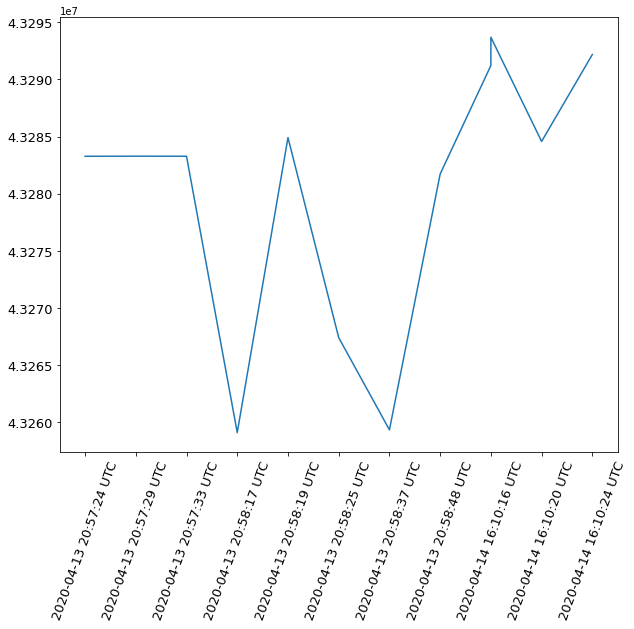

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
times=df.loc[lambda df: df['user_id'] ==1826278.0, :]['created_at']
object_id= df.loc[lambda df: df['user_id'] ==1826278.0, :]['subject_ids']

plt.plot(times, object_id)
ax.tick_params(axis='x', rotation=70, labelsize=13)
ax.tick_params(axis='y', rotation=0, labelsize=13)